1.Kullanacağımız paketleri çağıracağız.
2.Veri Setlerini tanımlayacağız.
3.Regresyon Modelini kur ve mevcut veriyi uydur.
4.Sonuçları değerlendir ve tahmin gerçekleştir.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

problem: Satış rakamları reklam harcamalarından etkileniyor mu?

In [29]:
satislar= np.array([22,21,23,26,30,31,32]) #bağımlı değişken (y)
reklam_giderler=np.array([7,11,15,22,26,28,31]) #bağımsız değişken(x)

In [30]:
df=pd.DataFrame({'satislar':satislar,'reklam_giderler':reklam_giderler})

In [31]:
df.head()

,satislar,reklam_giderler
0,22,7
1,21,11
2,23,15
3,26,22
4,30,26


In [ ]:
df.index = ['2000','2001','2003','2004','2005','2006']

In [32]:
yillar=[str(x+2000) for x in range(7)]
yillar

['2000', '2001', '2002', '2003', '2004', '2005', '2006']

In [16]:
df.index=yillar

In [35]:
df.head()

,satislar,reklam_giderler
0,22,7
1,21,11
2,23,15
3,26,22
4,30,26


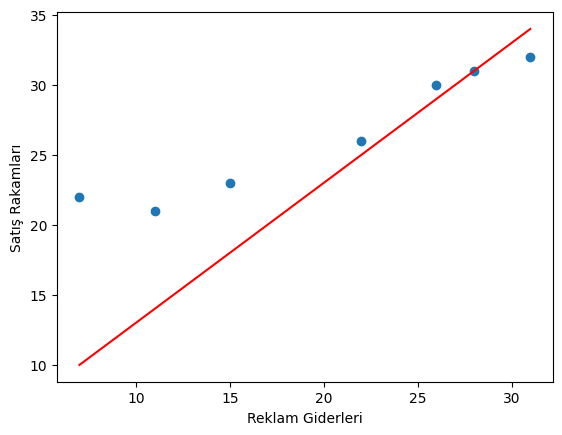

In [18]:
plt.scatter(x=reklam_giderler,y=satislar)
plt.xlabel('Reklam Giderleri')
plt.ylabel('Satış Rakamları')
plt.plot(reklam_giderler,reklam_giderler*1+3,color='red')

Önemli Fonksiyonlar
1.fit()
2.transform()
3.fit_transform()

In [19]:
linear_model = LinearRegression()

In [20]:
reklam_giderler

array([ 7, 11, 15, 22, 26, 28, 31])

In [21]:
reklam_giderler = reklam_giderler.reshape(-1,1)
reklam_giderler

array([[ 7],
       [11],
       [15],
       [22],
       [26],
       [28],
       [31]])

In [22]:
linear_model.fit(X=reklam_giderler,y=satislar)

LinearRegression()

In [34]:
linear_model.coef_

array([0.484])

In [23]:
linear_model.intercept_

16.74857142857143

In [25]:
print("beta_0 = {}, beta_1 ={}".format(linear_model.intercept_,
linear_model.coef_[0]))

beta_0 = 16.74857142857143, beta_1 =0.48399999999999993


In [26]:
linear_model.score(X=reklam_giderler,y=satislar)

0.9317000000000001

In [33]:
satislar_tahmin = linear_model.predict(reklam_giderler)
satislar_tahmin

array([20.13657143, 22.07257143, 24.00857143, 27.39657143, 29.33257143,
       30.30057143, 31.75257143])

In [28]:
satislar

array([22, 21, 23, 26, 30, 31, 32])

In [34]:
hatalar = satislar -satislar_tahmin
hatalar

array([ 1.86342857, -1.07257143, -1.00857143, -1.39657143,  0.66742857,
        0.69942857,  0.24742857])

In [36]:
hatalarin_karesi = np.square(hatalar)
hatalarin_karesi
#hatalarin_karesi = hatalar**2

array([3.47236604, 1.15040947, 1.01721633, 1.95041176, 0.4454609 ,
       0.48920033, 0.0612209 ])

In [40]:
r_2 = 1 - ((hatalarin_karesi).sum() /
((satislar.mean())**2).sum()).sum()

In [41]:
r_2

0.9877069978086195

Gerçek ve tahmin verilerinin görselleştirilmesi

Text(0.5, 1.0, 'Satış ve Reklam İlişkisi')

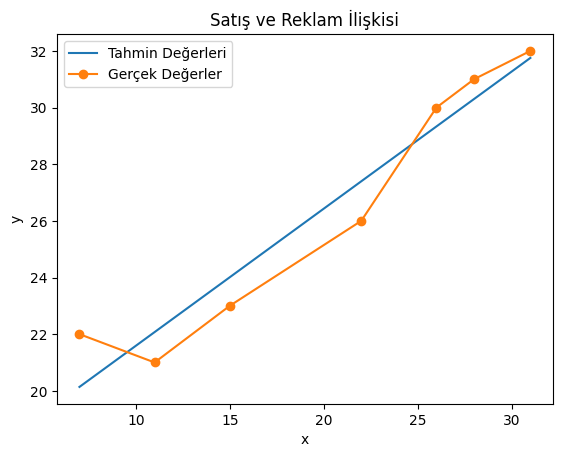

In [47]:
plt.plot(reklam_giderler,satislar_tahmin, label='Tahmin Değerleri')
plt.plot(reklam_giderler,satislar, label ='Gerçek Değerler',marker='o')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Satış ve Reklam İlişkisi')

Text(0, 0.5, 'Satış Rakamları')

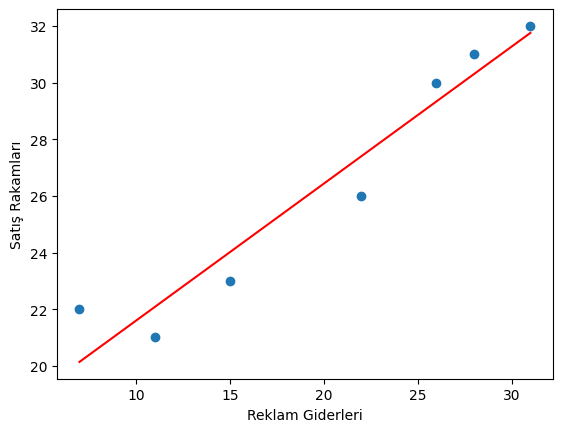

In [49]:
plt.scatter(x=reklam_giderler,y=satislar)
plt.plot(reklam_giderler,
reklam_giderler*linear_model.coef_[0]+linear_model.intercept_,color='red')
plt.xlabel('Reklam Giderleri')
plt.ylabel('Satış Rakamları')
